In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
data.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
print(data.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [6]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
data=data.drop(['Unnamed: 0','pickup_datetime'],axis=1)

In [10]:
data.columns

Index(['key', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [11]:
data.isnull().sum()

key                  0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
data.shape

(199999, 7)

<Axes: ylabel='pickup_latitude'>

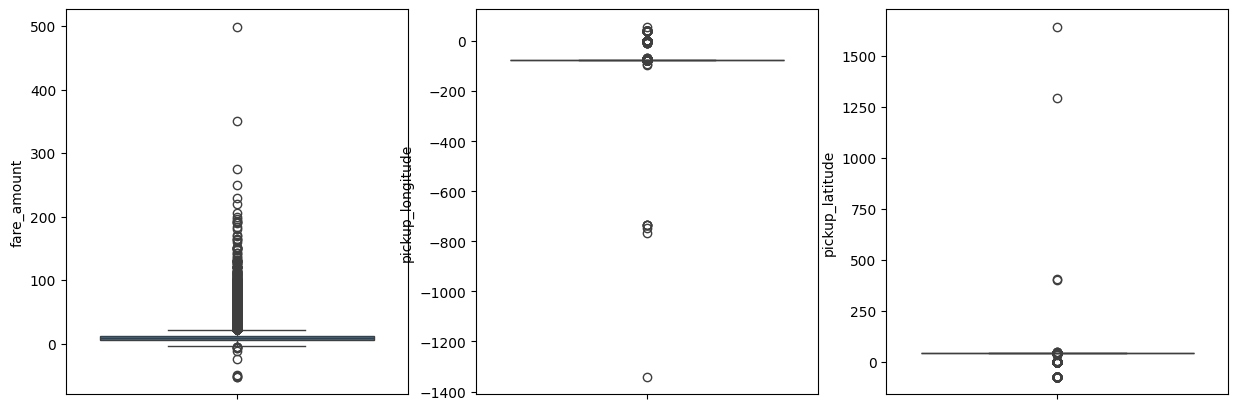

In [13]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data['fare_amount'],ax=ax[0])
sns.boxplot(data=data['pickup_longitude'],ax=ax[1])
sns.boxplot(data=data['pickup_latitude'],ax=ax[2])

<Axes: ylabel='passenger_count'>

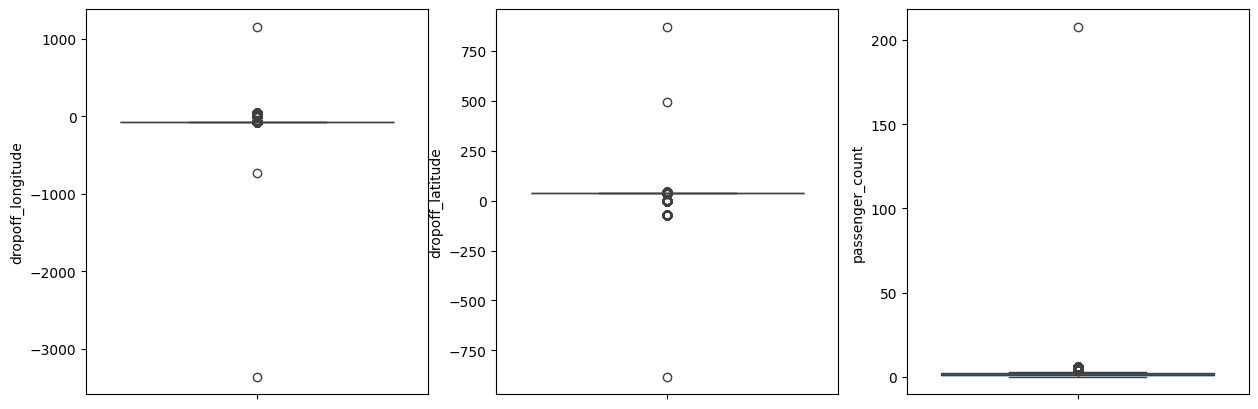

In [14]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data['dropoff_longitude'],ax=ax[0])
sns.boxplot(data=data['dropoff_latitude'],ax=ax[1])
sns.boxplot(data=data['passenger_count'],ax=ax[2])

In [15]:
data.columns

Index(['key', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [16]:
def remove_outliers(feature):
    global data
    q3,q1=np.percentile(data[feature],[75,25])
    iqr=q3-q1
    data=data[(data[feature]<=q3+1.5*iqr)&(data[feature]>=q1-1.5*iqr)]


In [17]:
remove_outliers('fare_amount')



<Axes: ylabel='passenger_count'>

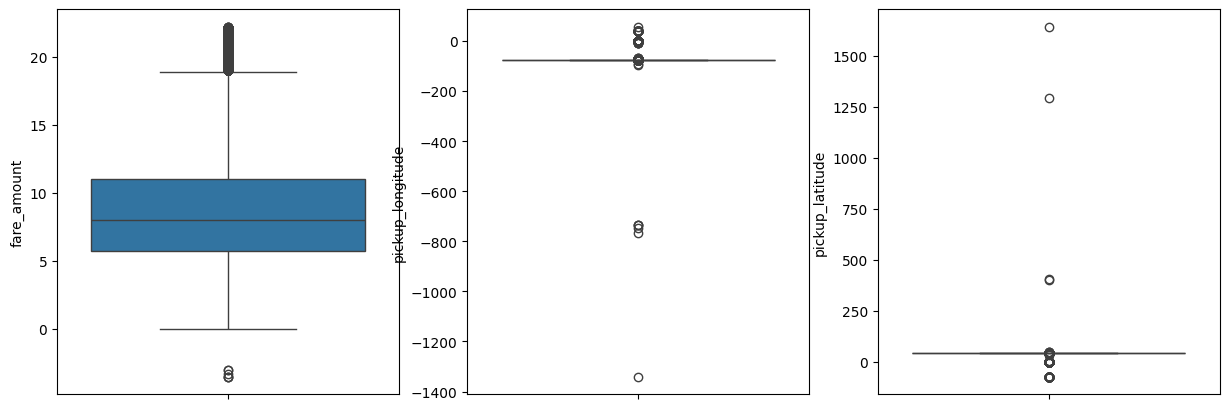

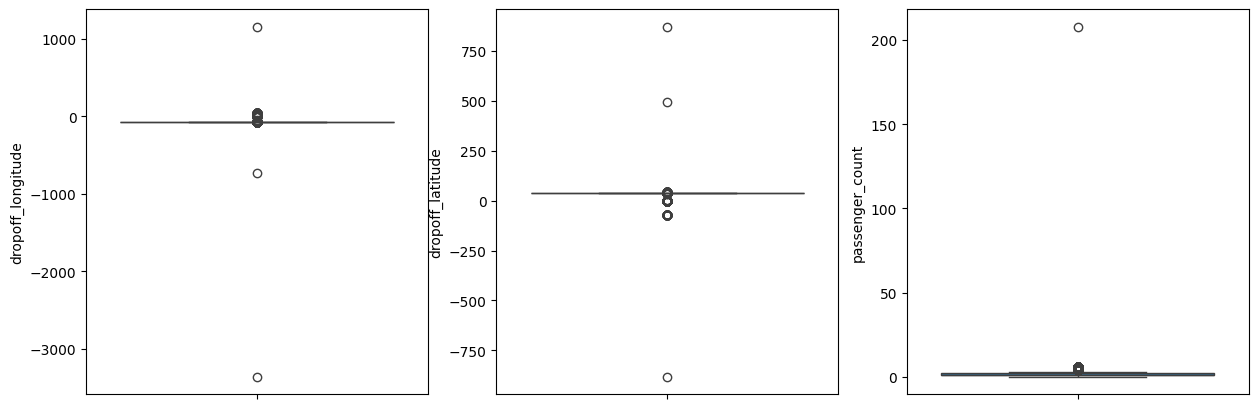

In [18]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data['fare_amount'],ax=ax[0])
sns.boxplot(data=data['pickup_longitude'],ax=ax[1])
sns.boxplot(data=data['pickup_latitude'],ax=ax[2])

fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data['dropoff_longitude'],ax=ax[0])
sns.boxplot(data=data['dropoff_latitude'],ax=ax[1])
sns.boxplot(data=data['passenger_count'],ax=ax[2])

In [19]:
data.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5


In [20]:
data.drop(['key'],axis=1,inplace=True)

In [21]:
cor=data.corr()

<Axes: >

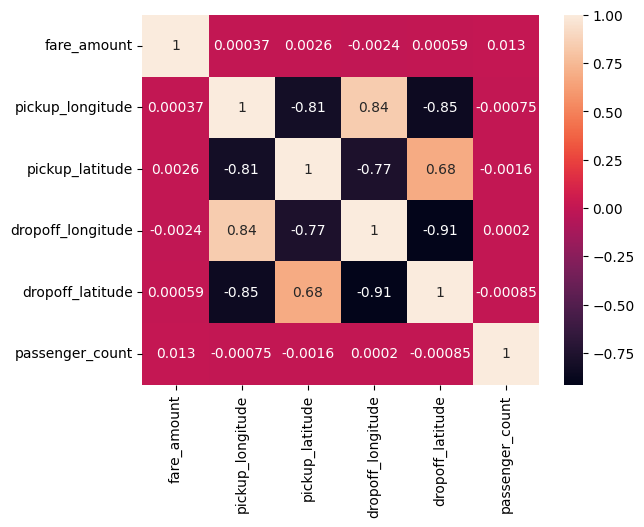

In [22]:
sns.heatmap(cor,annot=True)

In [23]:
print(cor)


                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.000367         0.002618   
pickup_longitude      0.000367          1.000000        -0.812047   
pickup_latitude       0.002618         -0.812047         1.000000   
dropoff_longitude    -0.002413          0.835950        -0.767103   
dropoff_latitude      0.000589         -0.850574         0.684558   
passenger_count       0.012618         -0.000751        -0.001604   

                   dropoff_longitude  dropoff_latitude  passenger_count  
fare_amount                -0.002413          0.000589         0.012618  
pickup_longitude            0.835950         -0.850574        -0.000751  
pickup_latitude            -0.767103          0.684558        -0.001604  
dropoff_longitude           1.000000         -0.913949         0.000203  
dropoff_latitude           -0.913949          1.000000        -0.000853  
passenger_count             0.000203         -0.000853         1.000000 

In [24]:
print(cor['fare_amount'])

fare_amount          1.000000
pickup_longitude     0.000367
pickup_latitude      0.002618
dropoff_longitude   -0.002413
dropoff_latitude     0.000589
passenger_count      0.012618
Name: fare_amount, dtype: float64


In [25]:
X=data.drop(['fare_amount'],axis=1)
y=data['fare_amount']

In [26]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred=model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [30]:
print(RMSE)

4.136624287486402


In [31]:
r_s=r2_score(y_test,y_pred)
print(r_s)

8.29713376748753e-05
